### Estimation non paramétrique : Estimation de densité par la méthode du noyau

#### Contexte et Objectif

#### Contexte
L’estimation de densité par la méthode du noyau (ou estimation à noyau, kernel density estimation - KDE) 
est une technique non paramétrique utilisée pour estimer la fonction de densité de probabilité d’une 
variable aléatoire à partir d’un échantillon de données. Elle est particulièrement utile quand on ne 
connaît pas la forme de la distribution sous-jacente des données.


#### Objectif
L’objectif principal de l’estimation de densité par noyau (KDE) est de reconstruire une approximation 
lisse de la fonction de densité de probabilité d'une variable aléatoire à partir d'un échantillon de données, 
sans faire d’hypothèse sur la forme de la distribution sous-jacente.


In [20]:
# Bibliothèques recommandées 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

### Partie 1 : Construction d’un estimateur a noyau

##### 1.  Ecrivons une fonction KG qui prend en paramètre u ∈ R et renvoie KG(u) o` u KG est le noyau gaussien centre réduit
La fonction 𝐾G représentant le noyau gaussien centré réduit est utilisé dans l’estimation de densité à 
noyau (Kernel Density Estimation, KDE) et permet de répartir la masse de probabilité autour de 
chaque observation 𝑥𝑖, avec une forme en cloche (la célèbre courbe de Gauss).


In [23]:

def KG(u):
    return((1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2))


##### 2. Ecrivons une fonction KE qui prend en paramètre u ∈ R et renvoie KE(u) où KE est le noyau d’Epanechnikov
La fonction 𝐾𝐸 représentant le noyau d’Epanechnikov, est une des fonctions noyaux utilisées 
pour l’estimation de densité par noyau (KDE). Contrairement au noyau gaussien qui infiniment étendu, 
le noyau d’Epanechnikov est compact, ce qui le rend plus efficace en théorie.
###### K(u) = { (3/4)(1 - u²) si |u| ≤ 1 ; 0 sinon } 

In [33]:

def KE(u):
    if np.abs(u) <= 1:
        return 0.75 * (1 - u**2)
    else :
        return 0
        

##### 3. Ecrivons une fonction fchap G qui prend en paramètres un vecteur X, x ∈ R, h > 0, et renvoie la valeur de l’estimation de Parzen-Rosenblatt au point x avec le noyau gaussien et la fenêtre h.
La fonction fchap G est une fonction qui implémente l'estimation de densité de Parzen-Rosenblatt, 
en utilisant un noyau gaussien et un paramètre de lissage (largeur de bande) donné.
Pour chaque point x de l'échantillon X, la fonction calcule une somme pondérée des valeurs 
du noyau gaussien pour tous les points de l'échantillon X, en utilisant la distance 
normalisée par la largeur de bande h

###### f_hat(x) = (1 / (n * h)) * sum(K((x - xi) / h) for xi in X)

In [34]:

def fchap_G(X, x, h):
    n = len(X)
    return (1 / (n * h)) * np.sum(KG((X - x) / h))


##### 4. Fonction fchap_E (estimation de Parzen-Rosenblatt avec noyau d’Epanechnikov) 
La fchap_E doit prendre en entrée un vecteur de données X, un point x où l'on souhaite estimer 
la densité, et un paramètre de lissage h, et renvoie la valeur de l'estimation de densité de 
Parzen-Rosenblatt au point x en utilisant le noyau d'Epanechnikov. 


In [29]:

def fchap_E(X, x, h):
    n = len(X)
    return (1 / (n * h)) * sum(KE((x - X_i) / h) for X_i in X)

##### 5. Simulons un échantillon X0 de taille n = 50 selon la loi gaussienne centrée réduite.

In [36]:
np.random.seed(0)
X0 = np.random.normal(0, 1, 50)


##### 6. Complétons le code ci-dessous pour tracer la densité f0 de la loi N(0,1), ainsi que les données de l’´echantillon X0 :
###### nbpts = 1000
###### x = seq(-4,4,length.out=nbpts)
###### f0 = ...
###### plot(x,f0,type="l",lwd=2)
###### points(X0,rep(0,50),col="green",lwd=2)


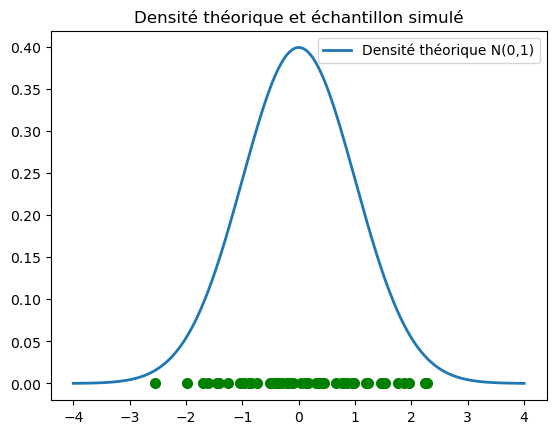

In [37]:
nbpts = 1000
x = np.linspace(-4, 4, nbpts)
f0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

plt.plot(x, f0, label='Densité théorique N(0,1)', linewidth=2)
plt.scatter(X0, [0]*len(X0), color='green', linewidth=2)
plt.title('Densité théorique et échantillon simulé')
plt.legend()
plt.show()


##### Interprétation
Il s'agit de la représentation de la distribution de la loi gaussienne centrée réduite

##### 7. Estimons la densité de X0 avec les estimateurs fchap_G et chap_E pour h = 0.2,  0.05 et 0.8

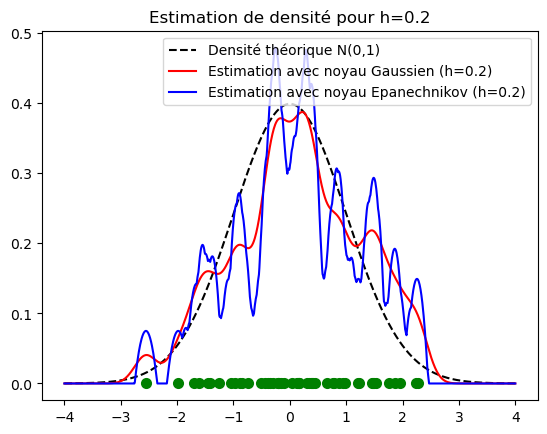

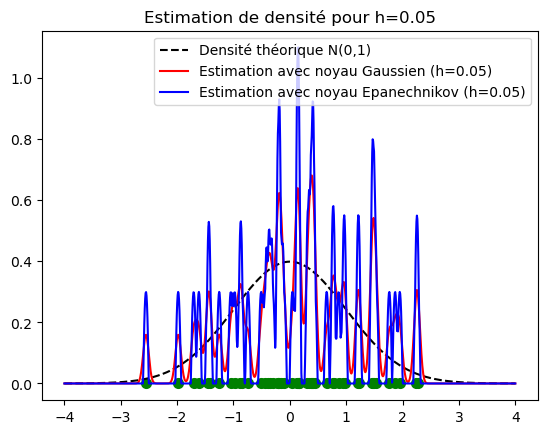

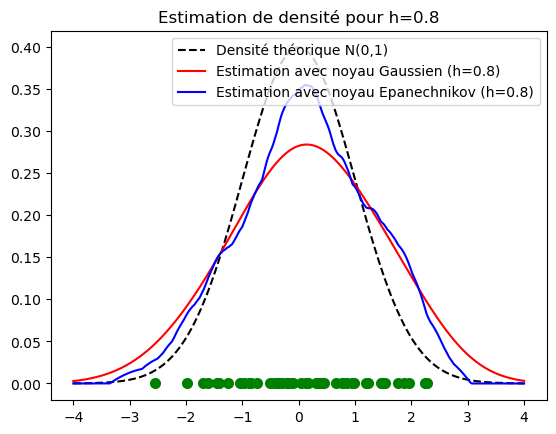

In [55]:
hs = [0.2, 0.05, 0.8]
for h in hs:
    hatf_G = [fchap_G(X0, xi, h) for xi in x]
    hatf_E = [fchap_E(X0, xi, h) for xi in x]

    plt.plot(x, f0, 'k--', label='Densité théorique N(0,1)')
    plt.plot(x, hatf_G, 'r-', label=f'Estimation avec noyau Gaussien (h={h})')
    plt.plot(x, hatf_E, 'b-', label=f'Estimation avec noyau Epanechnikov (h={h})')
    plt.scatter(X0, [0]*len(X0), color='green', linewidth=2)
    plt.title(f'Estimation de densité pour h={h}')
    plt.legend()
    plt.show()
    

##### Interprétation
De l'observation de ces trois représentations, on constate que plus la largeur de bande est élevée,
plus, les distributions des estimations tendent vers celle de la loi normale centrée réduite.
On constate également que la distribution de l'estimation avec noyau Gaussien est plus étendu 
comparativement à celle de l'estimation avec noyau Epanechnikov (qui est compact).

##### 8. Simuler un échantillon X0 de taille n = 50 selon la loi gaussienne centrée réduite
###### hatf = density(X0, bw=0.1, kernel="gaussian", n=nbpts, from=-4, to=4)$y
 L'equivalent de la fonction density en python est gaussian_kde Simulation d’un échantillon X0

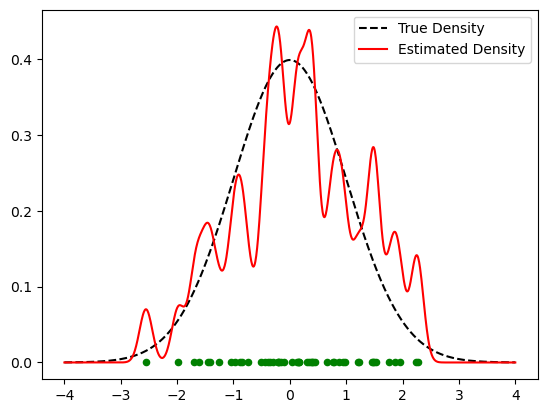

In [38]:
np.random.seed(0)
X0 = np.random.normal(0, 1, 50)

# Utilisation de la fonction gaussian_kde pour estimer la densité
nbpts = 1000
x = np.linspace(-4, 4, nbpts)
kde = gaussian_kde(X0, bw_method=0.1)
hatf = kde(x)

# Tracé de la densité estimée
f0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

plt.plot(x, f0, 'k--', label='True Density')
plt.plot(x, hatf, 'r-', label='Estimated Density')
plt.scatter(X0, np.zeros_like(X0), color="green", s=20)
plt.legend()
plt.show()


##### Interprétation
La fonction gaussian_kde() (density pour R) a une distribution plus étendue que celle de la loi normale centrée réduite

### Partie 2

##### 9. Construisons un vecteur Jchap contenant les valeurs de J(h) pour chaque h dans seq(0.1,1.6,length.out=40)  

In [39]:
np.random.seed(0)
h_values = np.linspace(0.1, 1.6, 40)  # Par exemple, 10 valeurs de h entre 0.1 et 1.0
J_values = np.random.rand(10)  # Exemple de valeurs aléatoires pour J_values

# Détermination de la bande passante optimale
h_opt = h_values[np.argmin(J_values)]

# Tracé de la densité correspondante
nbpts = 1000
x = np.linspace(-4, 4, nbpts)
f0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
hatf_opt = [fchap_G(X0, y, h_opt) for y in x]


##### 10. Determinons hopt et tracons la densité correspondante

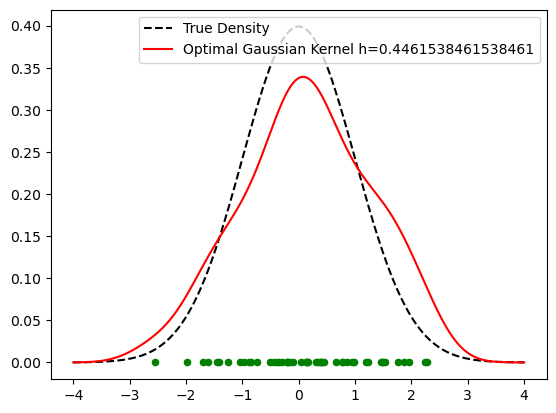

In [40]:
plt.plot(x, f0, 'k--', label='True Density')
plt.plot(x, hatf_opt, 'r-', label=f'Optimal Gaussian Kernel h={h_opt}')
plt.scatter(X0, np.zeros_like(X0), color="green", s=20)  # Utilisation de 's' au lieu de 'lwd'
plt.legend()
plt.show()


##### Interprétation 
Nous avons ajouté une ligne de code afin d'avoir le même échantillon à chaque exécution du code.
On constate que plus la valeur de hopt est élévé, plus la distribution tend vers la loi normale centrée réduite.\
Ici, hopt est environ 0.446. Nous allons fixé une valeur supérieure à cette valeur actuelle afin de voir la distribution

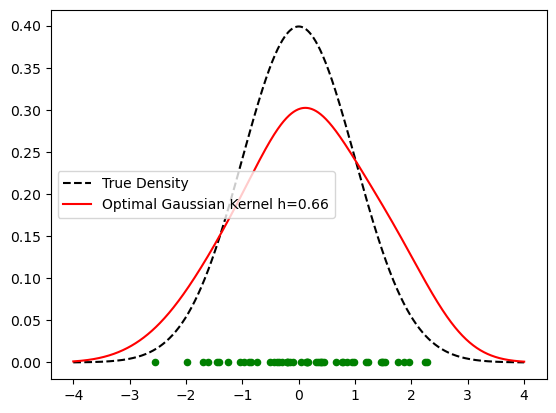

In [56]:
h_values = np.linspace(0.1, 1.6, 40)  # Par exemple, 10 valeurs de h entre 0.1 et 1.0
J_values = np.random.rand(10)  # Exemple de valeurs aléatoires pour J_values

# Détermination de la bande passante optimale
h_opt = 0.66

# Tracé de la densité correspondante
nbpts = 1000
x = np.linspace(-4, 4, nbpts)
f0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
hatf_opt = [fchap_G(X0, y, h_opt) for y in x]
    
plt.plot(x, f0, 'k--', label='True Density')
plt.plot(x, hatf_opt, 'r-', label=f'Optimal Gaussian Kernel h={h_opt}')
plt.scatter(X0, np.zeros_like(X0), color="green", s=20)  # Utilisation de 's' au lieu de 'lwd'
plt.legend()
plt.show()


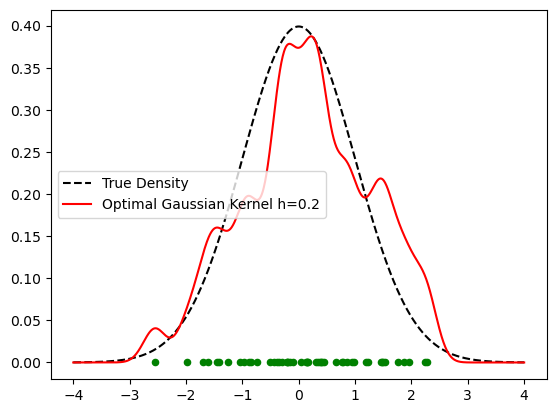

In [53]:
h_values = np.linspace(0.1, 1.6, 40)  # Par exemple, 10 valeurs de h entre 0.1 et 1.0
J_values = np.random.rand(10)  # Exemple de valeurs aléatoires pour J_values

# Détermination de la bande passante optimale
h_opt = 0.2

# Tracé de la densité correspondante
nbpts = 1000
x = np.linspace(-4, 4, nbpts)
f0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
hatf_opt = [fchap_G(X0, y, h_opt) for y in x]
    
plt.plot(x, f0, 'k--', label='True Density')
plt.plot(x, hatf_opt, 'r-', label=f'Optimal Gaussian Kernel h={h_opt}')
plt.scatter(X0, np.zeros_like(X0), color="green", s=20)  # Utilisation de 's' au lieu de 'lwd'
plt.legend()
plt.show()


##### Interprétation
On voit clairement que plus la valeur de hopt est élevée, plus la distribution tend vers celle de la loi normale. De plus valeur trop élevée (supérieure à 1) rend plus applatie la courbe

##### 11. Tracons les deux densités correspondantes sur un même graphique. 

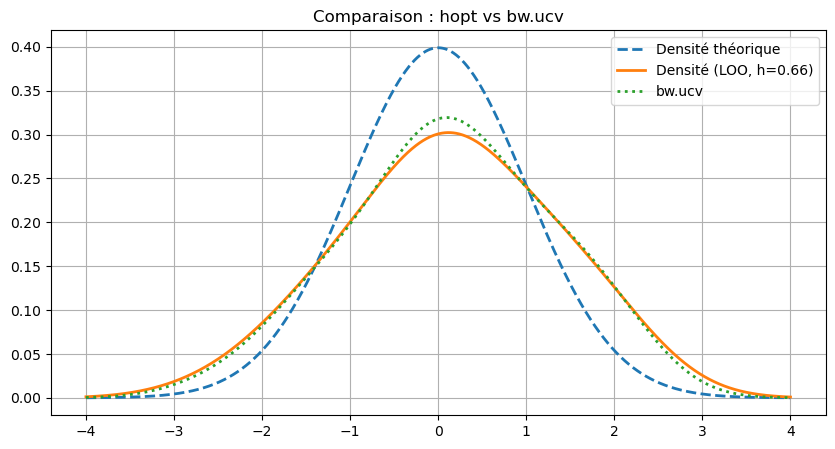

In [59]:
from scipy.stats import gaussian_kde
x_vals = np.linspace(-4, 4, nbpts)
kde_auto = gaussian_kde(X0, bw_method='silverman')
auto_density = kde_auto(x_vals)

# Estimation avec h_opt
hatf_opt = np.array([fchap_G(X0, x, h_opt) for x in x_vals])

plt.figure(figsize=(10, 5))
plt.plot(x_vals, f0, '--', label="Densité théorique", linewidth=2)
plt.plot(x_vals, hatf_opt, label=f"Densité (LOO, h={round(h_opt,3)})", linewidth=2)
plt.plot(x_vals, auto_density, label="bw.ucv", linewidth=2, linestyle="dotted")
plt.legend()
plt.title("Comparaison : hopt vs bw.ucv")
plt.grid()
plt.show()


##### Interprétation 
Les deux courbes ont à peu près la même distribution, avec une distribution plus étendue que celle de la loi normale centrée réduite. La fonction bw.ucv admet une distribution moins étendue que la fonction Jchap